# Figure 3

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

## Beautifying Figure 3

In [2]:
confusion_matrix={
	"XHMM":
		[[746801, 2556, 14310],
		[7149, 56, 67],
		[1894, 12, 119]]
		,
	"DECoNT_XHMM":
		[[749417, 2567, 14342],
		[4877, 51, 70],
		[1550, 6, 84]]
		,
	"CONIFER":
		[[188992, 609, 3590],
		[0, 50, 0],
		[0, 0, 0]]
		,
	"DECoNT_CONIFER":
		[[188992, 619, 3590],
		[0, 40, 0],
		[0, 0, 0]]
		,
	"CODEX2":
		[[481333, 1704, 8882],
		[130138, 362, 2161],
		[144373, 558, 3453]]
		,
	"DECoNT_CODEX2":
		[[655677, 2266, 12338],
		[54791, 228, 1146],
		[45376, 130, 1012]]
		,
	"ECOLE":
		[[748390, 2224, 13165],
		[4197, 359, 604],
		[3257, 41, 727]]
		,
	"ECOLE_EXPERT":
		[[ 751069, 1136, 7931],
		[ 254, 1435, 129],
		[ 4521, 53, 6436]]
}

In [3]:
def calc(confusion_matrix):
    # precision, recall, f1, specificity, negative predictive value for deletion
    try:
        precision_del = confusion_matrix[2][2] / (confusion_matrix[2][2] + confusion_matrix[2][1] + confusion_matrix[2][0])
    except ZeroDivisionError:
        precision_del = 0.0
    try:
        recall_del = confusion_matrix[2][2] / (confusion_matrix[2][2] + confusion_matrix[1][2] + confusion_matrix[0][2])
    except ZeroDivisionError:
        recall_del = 0.0
    try:
        f1_del = 2 * precision_del * recall_del / (precision_del + recall_del)
    except ZeroDivisionError:
        f1_del = 0.0
    specificity_del = (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][
        1]) / (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1] +
               confusion_matrix[2][0] + confusion_matrix[2][1])
    npv_del = (confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[1][0] + confusion_matrix[1][1]) / (
            confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[1][0] +
            confusion_matrix[1][1] + confusion_matrix[1][2])
    print("precision, recall, f1, specificity, negative predictive value for deletion")
    print(f"{precision_del:.3}, {recall_del:.3}, {f1_del:.3}, {specificity_del:.3}, {npv_del:.3}")
    # precision, recall, f1, specificity, negative predictive value for duplication
    precision_dup = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0] + confusion_matrix[1][2])
    recall_dup = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[2][1])
    f1_dup = 2 * precision_dup * recall_dup / (precision_dup + recall_dup)
    specificity_dup = (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[2][0] + confusion_matrix[2][
        2]) / \
                      (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[1][0] + confusion_matrix[1][2]
                       + confusion_matrix[2][0] + confusion_matrix[2][2])
    npv_dup = (confusion_matrix[0][0] + confusion_matrix[0][2] + confusion_matrix[2][0] + confusion_matrix[2][2]) / (
            confusion_matrix[0][0] + confusion_matrix[0][1] + confusion_matrix[0][2] + confusion_matrix[2][0] +
            confusion_matrix[2][1] + confusion_matrix[2][2])
    print("precision, recall, f1, specificity, negative predictive value for duplication")
    print(f"{precision_dup:.3}, {recall_dup:.3}, {f1_dup:.3}, {specificity_dup:.3}, {npv_dup:.3}")

    # macro average of precision, recall, f1, specificity, negative predictive value
    print("macro average of precision, recall, f1, specificity, negative predictive value")
    print(
        f"{(precision_del + precision_dup) / 2:.3}, {(recall_del + recall_dup) / 2:.3}, {(f1_del + f1_dup) / 2:.3}, {(specificity_del + specificity_dup) / 2:.3}, {(npv_del + npv_dup) / 2:.3}")

In [4]:
def del_npv(method):
    FN = (confusion_matrix[method][0][2]+confusion_matrix[method][1][2])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][1]) + (confusion_matrix[method][1][0] + confusion_matrix[method][1][1])
    return round((TN/(TN+FN)),3)

def dup_npv(method):
    FN = (confusion_matrix[method][0][1]+confusion_matrix[method][2][1])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][2]) + (confusion_matrix[method][2][0] + confusion_matrix[method][2][2])
    return round((TN/(TN+FN)),3)

def overall_npv(method):
    return round(((del_npv(method)+dup_npv(method))/2),3)

In [41]:
XHMM =  [0.059, 0.008, 0.034, 0.008, 0.021, 0.015, 0.014, 0.012, 0.021]
CONIFER = [0.000, 1.000, 0.500, 0.000, 0.076, 0.038, 0.000, 0.141, 0.071]
CODEX2 = [0.023, 0.003, 0.013, 0.238, 0.138, 0.188, 0.042, 0.006, 0.024]
DECoNT_XHMM = [0.051, 0.010, 0.031, 0.006, 0.019, 0.013, 0.011, 0.013, 0.018]
DECoNT_CONIFER = [0.000, 1.000, 0.500, 0.000, 0.061, 0.031, 0.000, 0.115, 0.058]
DECoNT_CODEX2 = [0.022, 0.004, 0.013, 0.070, 0.087, 0.079, 0.033, 0.008, 0.022]
ECOLE = [0.181, 0.070, 0.126, 0.050, 0.137, 0.094, 0.078, 0.093, 0.108]
ECOLE_EXPERT = [0.584, 0.789, 0.687, 0.444, 0.547, 0.496, 0.504, 0.646, 0.576]

performance = {"XHMM":[XHMM,"gold"],"CONIFER":[CONIFER,"springgreen"],"CODEX2":[CODEX2,"blue"],"ÉCOLE":[ECOLE,"red"],"ÉCOLE$^{FT-EXPERT}$":[ECOLE_EXPERT,"maroon"]}
decont_performance = {"DECoNT_XHMM":[DECoNT_XHMM,"gold"],"DECoNT_CONIFER":[DECoNT_CONIFER,"springgreen"],"DECoNT_CODEX2":[DECoNT_CODEX2,"blue"],"ÉCOLE":[ECOLE,"red"],"ÉCOLE$^{FT-EXPERT}$":[ECOLE_EXPERT,"maroon"]}


C:\Users\mehme\AppData\Local\Temp\ipykernel_26552\3376919152.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5], xlim=[0,1.7])
C:\Users\mehme\AppData\Local\Temp\ipykernel_26552\3376919152.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.8])


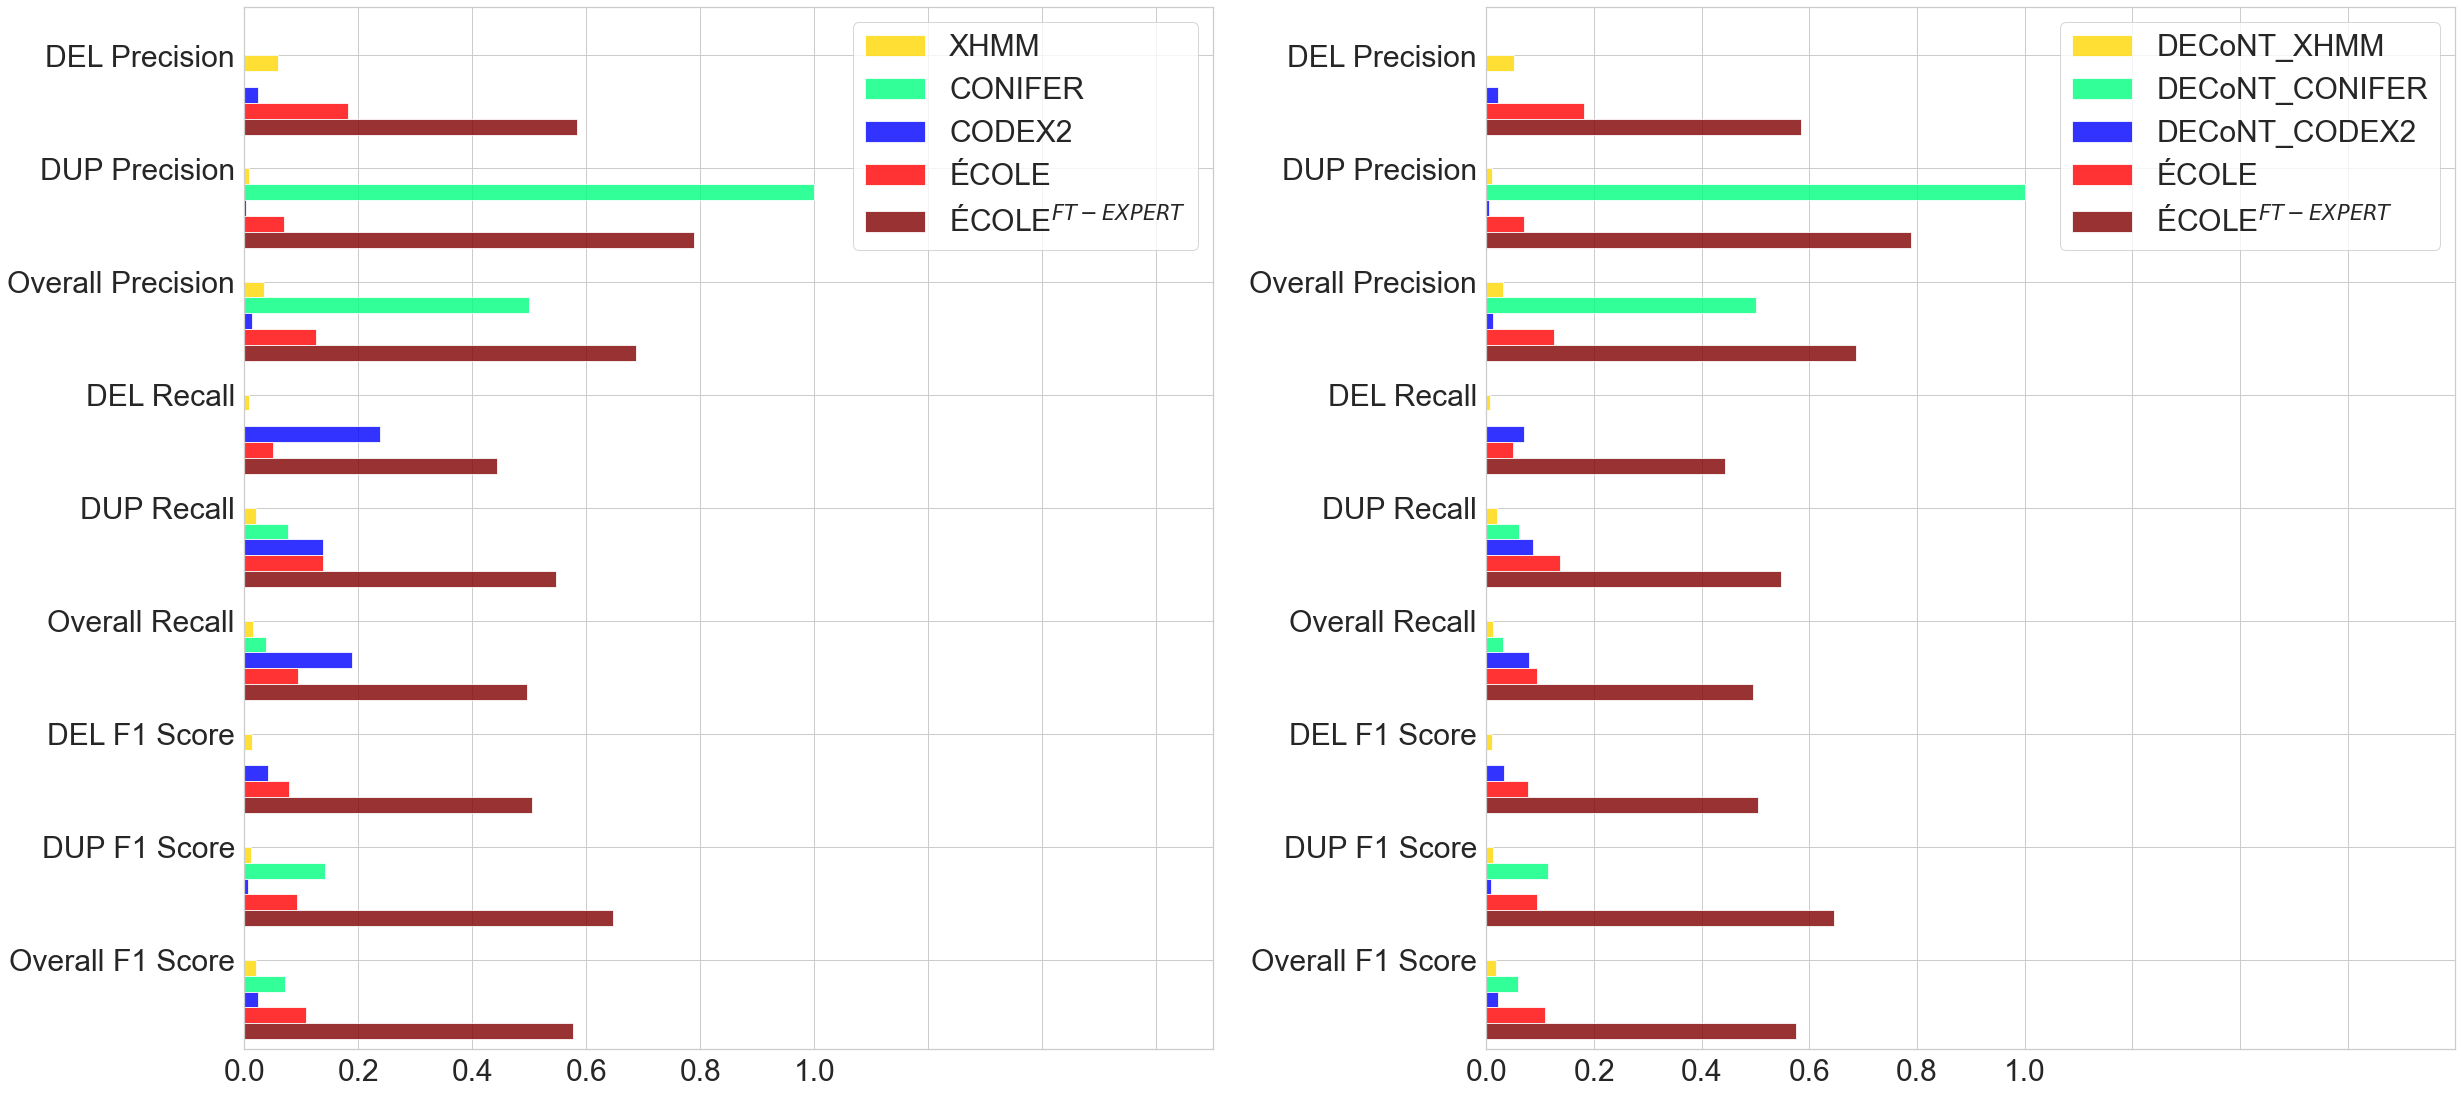

In [43]:
performanceTypes = ['DEL Precision','DUP Precision','Overall Precision','DEL Recall','DUP Recall','Overall Recall','DEL F1 Score','DUP F1 Score','Overall F1 Score']



ind = np.arange(len(performanceTypes))
width=0.14

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,16))
ax1 = plt.subplot(1, 2, 1)
for i,caller in enumerate(performance.keys()):
    ax1.barh(ind-i*width, list(reversed(performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5], xlim=[0,1.7])
ax1.tick_params(axis='both', which='major', labelsize=30)
ax1.legend(loc="upper right",fontsize=30)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for i,caller in enumerate(decont_performance.keys()):
    ax2.barh(ind-i*width, list(reversed(decont_performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=decont_performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)),xticklabels=np.round(list(np.linspace(0,1,6)),3), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.8])
ax2.tick_params(axis='both', which='major', labelsize=30)
ax2.legend(loc="upper right",fontsize=30)

fig.tight_layout(pad=3.0)

plt.savefig('Table3_new.pdf',bbox_inches='tight',pad_inches=0.6)

#plt.xlabel

## NPV Results

In [15]:
tools = [  "XHMM", "DECoNT_XHMM", "CONIFER","DECoNT_CONIFER", "CODEX2", "DECoNT_CODEX2", "ECOLE", "ECOLE_EXPERT"]
DEL_NPV = []
DUP_NPV = []
Overall_NPV = []
for tool in tools:
    DEL_NPV.append(del_npv(tool))
    DUP_NPV.append(dup_npv(tool))
    Overall_NPV.append(overall_npv(tool))

data = {
  "DEL NPV": DEL_NPV,
  "DUP NPV ": DUP_NPV,
  "Overall NPV": Overall_NPV
}

df = pd.DataFrame(data, index = tools)

print(df) 

                DEL NPV  DUP NPV   Overall NPV
XHMM              0.981     0.997        0.989
DECoNT_XHMM       0.981     0.997        0.989
CONIFER           0.981     0.997        0.989
DECoNT_CONIFER    0.981     0.997        0.989
CODEX2            0.982     0.996        0.989
DECoNT_CODEX2     0.981     0.997        0.989
ECOLE             0.982     0.997        0.990
ECOLE_EXPERT      0.989     0.998        0.994


In [16]:
print("XHMM")
print("---------------")
calc(confusion_matrix["XHMM"])
print("---------------")
print("DECoNT_XHMM")
print("---------------")
calc(confusion_matrix["DECoNT_XHMM"])
print("---------------")
print("CONIFER")
print("---------------")
calc(confusion_matrix["CONIFER"])
print("---------------")
print("DECoNT_CONIFER")
print("---------------")
calc(confusion_matrix["DECoNT_CONIFER"])
print("---------------")
print("CODEX2")
print("---------------")
calc(confusion_matrix["CODEX2"])
print("---------------")
print("DECoNT_CODEX2")
print("---------------")
calc(confusion_matrix["DECoNT_CODEX2"])
print("---------------")
print("ECOLE")
print("---------------")
calc(confusion_matrix["ECOLE"])
print("---------------")
print("ECOLE_EXPERT")
print("---------------")
calc(confusion_matrix["ECOLE_EXPERT"])
print("---------------")

XHMM
---------------
precision, recall, f1, specificity, negative predictive value for deletion
0.0588, 0.00821, 0.0144, 0.997, 0.981
precision, recall, f1, specificity, negative predictive value for duplication
0.0077, 0.0213, 0.0113, 0.991, 0.997
macro average of precision, recall, f1, specificity, negative predictive value
0.0332, 0.0148, 0.0129, 0.994, 0.989
---------------
DECoNT_XHMM
---------------
precision, recall, f1, specificity, negative predictive value for deletion
0.0512, 0.00579, 0.0104, 0.998, 0.981
precision, recall, f1, specificity, negative predictive value for duplication
0.0102, 0.0194, 0.0134, 0.994, 0.997
macro average of precision, recall, f1, specificity, negative predictive value
0.0307, 0.0126, 0.0119, 0.996, 0.989
---------------
CONIFER
---------------
precision, recall, f1, specificity, negative predictive value for deletion
0.0, 0.0, 0.0, 1.0, 0.981
precision, recall, f1, specificity, negative predictive value for duplication
1.0, 0.0759, 0.141, 1.0, 0.9

## CNV Distributions

In [5]:
cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00513_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00732_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00733_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/Chaisson_et_al_test_data/NA19240_labeled_data.npy',allow_pickle=True)
HG00513_labeled_data = test1[:,5]
HG00732_labeled_data = test2[:,5]
HG00733_labeled_data = test3[:,5]
NA19240_labeled_data = test4[:,5]

cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02153_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02232_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02291_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02330_labeled_data.npy',allow_pickle=True)
HG02153_labeled_data = test1[:,5]
HG02232_labeled_data = test2[:,5]
HG02291_labeled_data = test3[:,5]
HG02330_labeled_data = test4[:,5]

cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/Chaisson_et_al_finetuning_data/HG00512_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/Chaisson_et_al_finetuning_data/HG00731_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/Chaisson_et_al_finetuning_data/NA19238_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/Chaisson_et_al_finetuning_data/NA19239_labeled_data.npy',allow_pickle=True)
HG00512_labeled_data = test1[:,5]
HG00731_labeled_data = test2[:,5]
NA19238_labeled_data = test3[:,5]
NA19239_labeled_data = test4[:,5]


HG00513: {'DEL': 2606, 'DUP': 299}
HG00732: {'DEL': 2451, 'DUP': 359}
HG00733: {'DEL': 2955, 'DUP': 303}
NA19240: {'DEL': 3500, 'DUP': 323}
Total DEL: 11512
Total DUP: 1284


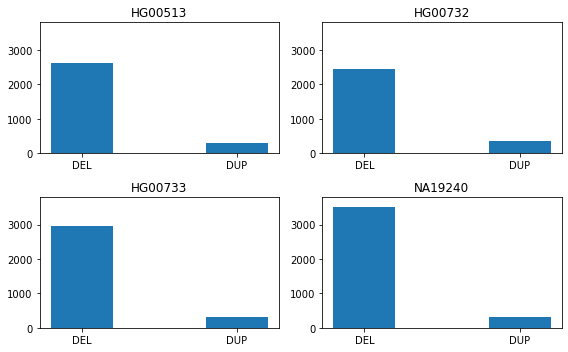

In [12]:
HG00513_cnv = {"DEL": np.sum(HG00513_labeled_data=="<DEL>"),"DUP": np.sum(HG00513_labeled_data=="<DUP>")}
HG00732_cnv = {"DEL": np.sum(HG00732_labeled_data=="<DEL>"),"DUP": np.sum(HG00732_labeled_data=="<DUP>")}
HG00733_cnv = {"DEL": np.sum(HG00733_labeled_data=="<DEL>"),"DUP": np.sum(HG00733_labeled_data=="<DUP>")}
NA19240_cnv = {"DEL": np.sum(NA19240_labeled_data=="<DEL>"),"DUP": np.sum(NA19240_labeled_data=="<DUP>")}

print("HG00513: "+ str(HG00513_cnv))
print("HG00732: "+str(HG00732_cnv))
print("HG00733: "+str(HG00733_cnv))
print("NA19240: "+str(NA19240_cnv))
print("Total DEL: "+str(HG00513_cnv["DEL"]+HG00732_cnv["DEL"]+HG00733_cnv["DEL"]+NA19240_cnv["DEL"]) )
print("Total DUP: "+str(HG00513_cnv["DUP"]+HG00732_cnv["DUP"]+HG00733_cnv["DUP"]+NA19240_cnv["DUP"]) )

fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG00513_cnv.keys(), HG00513_cnv.values(),width = 0.4)
ax[0,0].set_title("HG00513")
ax[0,0].set_ylim((0,3800))
ax[0,1].bar(HG00732_cnv.keys(), HG00732_cnv.values(),width = 0.4)
ax[0,1].set_title("HG00732")
ax[0,1].set_ylim((0,3800))
ax[1,0].bar(HG00733_cnv.keys(), HG00733_cnv.values(),width = 0.4)
ax[1,0].set_title("HG00733")
ax[1,0].set_ylim((0,3800))
ax[1,1].bar(NA19240_cnv.keys(), NA19240_cnv.values(),width = 0.4)
ax[1,1].set_title("NA19240")
ax[1,1].set_ylim((0,3800))
fig.tight_layout()
plt.show()

HG00512: {'DEL': 2944, 'DUP': 250}
HG00731: {'DEL': 2604, 'DUP': 299}
NA19238: {'DEL': 4758, 'DUP': 344}
NA19239: {'DEL': 2832, 'DUP': 329}
Total DEL: 13138
Total DUP: 1222


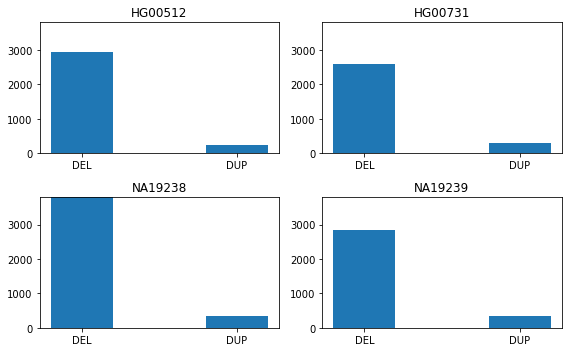

In [11]:
HG00512_cnv = {"DEL": np.sum(HG00512_labeled_data=="<DEL>"),"DUP": np.sum(HG00512_labeled_data=="<DUP>")}
HG00731_cnv = {"DEL": np.sum(HG00731_labeled_data=="<DEL>"),"DUP": np.sum(HG00731_labeled_data=="<DUP>")}
NA19238_cnv = {"DEL": np.sum(NA19238_labeled_data=="<DEL>"),"DUP": np.sum(NA19238_labeled_data=="<DUP>")}
NA19239_cnv = {"DEL": np.sum(NA19239_labeled_data=="<DEL>"),"DUP": np.sum(NA19239_labeled_data=="<DUP>")}

print("HG00512: "+ str(HG00512_cnv))
print("HG00731: "+str(HG00731_cnv))
print("NA19238: "+str(NA19238_cnv))
print("NA19239: "+str(NA19239_cnv))
print("Total DEL: "+str(HG00512_cnv["DEL"]+HG00731_cnv["DEL"]+NA19238_cnv["DEL"]+NA19239_cnv["DEL"]) )
print("Total DUP: "+str(HG00512_cnv["DUP"]+HG00731_cnv["DUP"]+NA19238_cnv["DUP"]+NA19239_cnv["DUP"]) )

fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG00512_cnv.keys(), HG00512_cnv.values(),width = 0.4)
ax[0,0].set_title("HG00512")
ax[0,0].set_ylim((0,3800))
ax[0,1].bar(HG00731_cnv.keys(), HG00731_cnv.values(),width = 0.4)
ax[0,1].set_title("HG00731")
ax[0,1].set_ylim((0,3800))
ax[1,0].bar(NA19238_cnv.keys(), NA19238_cnv.values(),width = 0.4)
ax[1,0].set_title("NA19238")
ax[1,0].set_ylim((0,3800))
ax[1,1].bar(NA19239_cnv.keys(), NA19239_cnv.values(),width = 0.4)
ax[1,1].set_title("NA19239")
ax[1,1].set_ylim((0,3800))
fig.tight_layout()
plt.show()

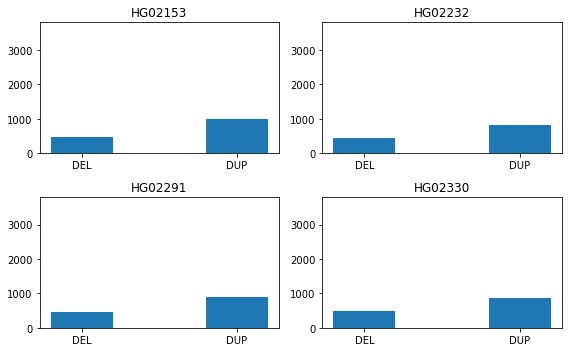

In [4]:
HG02153_cnv = {"DEL": np.sum(HG02153_labeled_data=="<DEL>"),"DUP": np.sum(HG02153_labeled_data=="<DUP>")}
HG02232_cnv = {"DEL": np.sum(HG02232_labeled_data=="<DEL>"),"DUP": np.sum(HG02232_labeled_data=="<DUP>")}
HG02291_cnv = {"DEL": np.sum(HG02291_labeled_data=="<DEL>"),"DUP": np.sum(HG02291_labeled_data=="<DUP>")}
HG02330_cnv = {"DEL": np.sum(HG02330_labeled_data=="<DEL>"),"DUP": np.sum(HG02330_labeled_data=="<DUP>")}
  
fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG02153_cnv.keys(), HG02153_cnv.values(),width = 0.4)
ax[0,0].set_title("HG02153")
ax[0,0].set_ylim((0,3800))
ax[0,1].bar(HG02232_cnv.keys(), HG02232_cnv.values(),width = 0.4)
ax[0,1].set_title("HG02232")
ax[0,1].set_ylim((0,3800))
ax[1,0].bar(HG02291_cnv.keys(), HG02291_cnv.values(),width = 0.4)
ax[1,0].set_title("HG02291")
ax[1,0].set_ylim((0,3800))
ax[1,1].bar(HG02330_cnv.keys(), HG02330_cnv.values(),width = 0.4)
ax[1,1].set_title("HG02330")
ax[1,1].set_ylim((0,3800))
fig.tight_layout()
plt.show()